In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

USD_TO_SAR = 3.75
color_green = '#286140'
color_gold = '#b58500'

def save_and_show(filename):
    plt.tight_layout()
    # 1. Save FIRST
    plt.savefig(filename)
    print(f"   [Output] Chart saved as: {filename}")
    # 2. Then Show
    plt.show()
    # 3. Close to clear memory
    plt.close()

>>> STEP 7: ANALYZING DEMOGRAPHICS & COMPLICATIONS...


C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_20968\2467702002.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars1 = sns.barplot(data=df_comp_status, x='Status', y='Cost_SAR', palette=[color_green, color_gold])


   [Output] Chart saved as: Chart_Complications_Cost.png


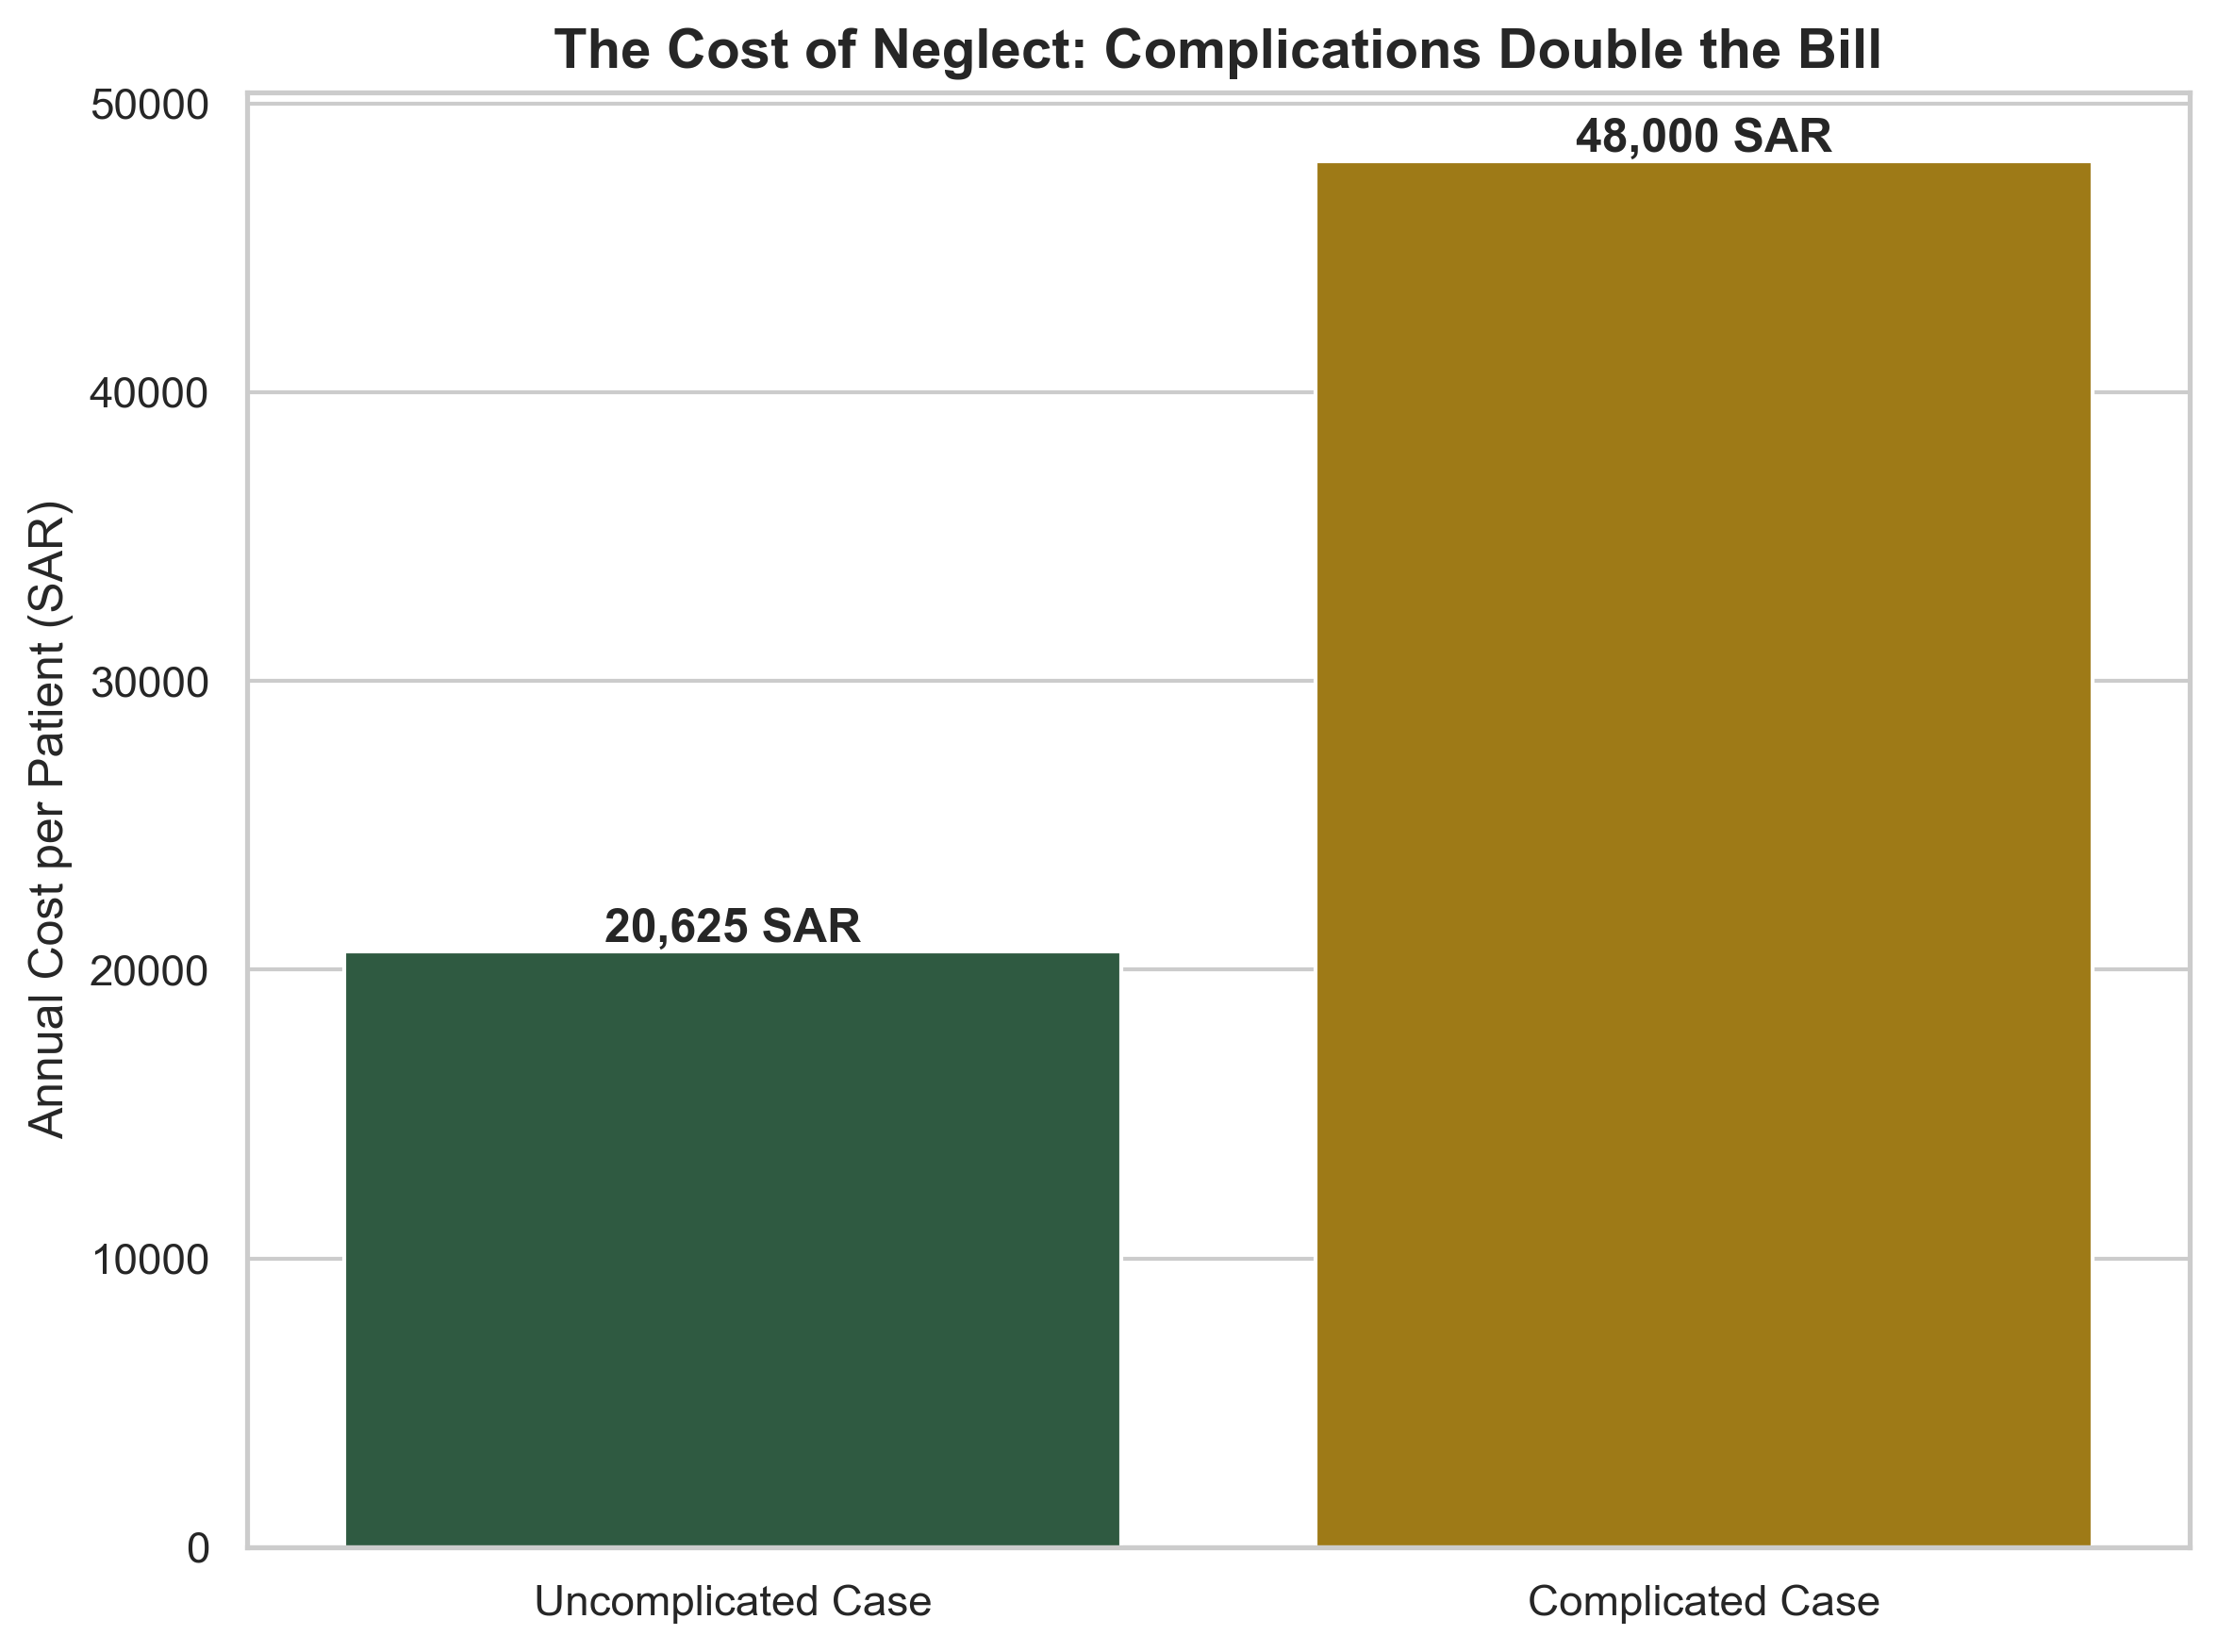

C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_20968\2467702002.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars2 = sns.barplot(data=df_gender, x='Gender', y='Cost_SAR', palette=[color_green, color_gold])


   [Output] Chart saved as: Chart_Gender_Cost.png


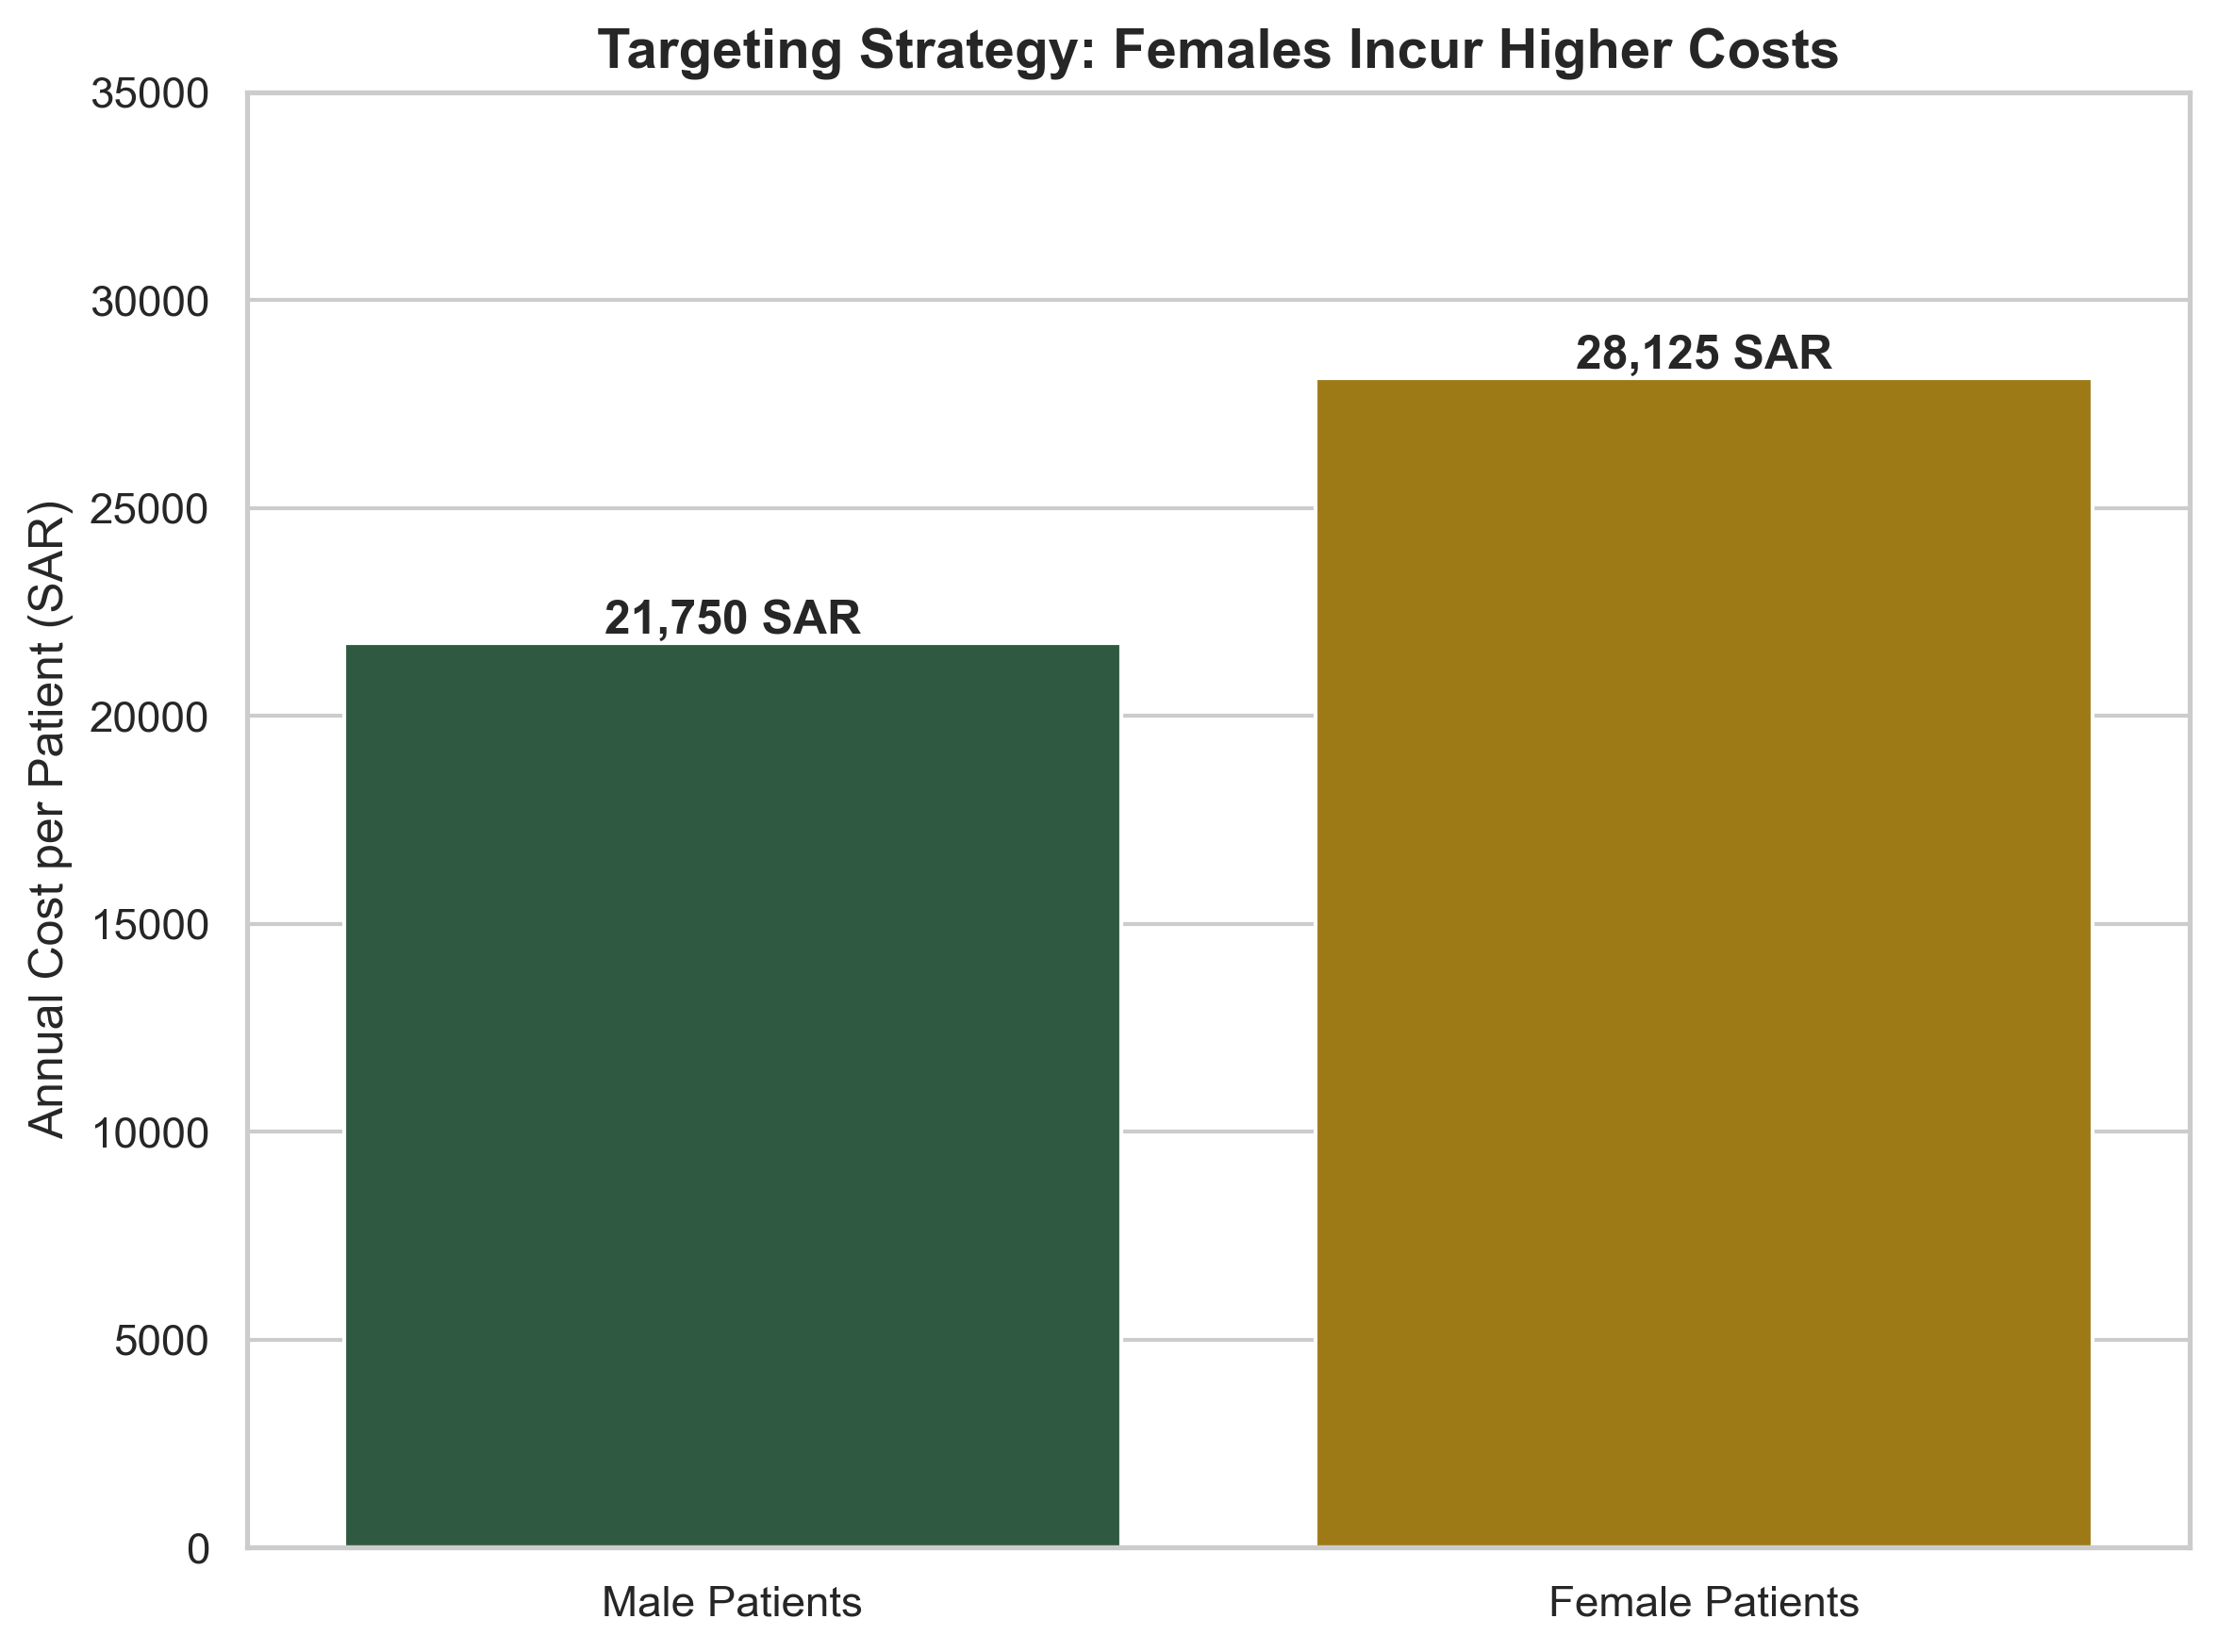

   -> Complication Multiplier: 2.3x (Complicated cases are 2.3 times more expensive).
   -> Gender Gap: Treating females costs 6,375 SAR more per year.


In [9]:
print(">>> STEP 7: ANALYZING DEMOGRAPHICS & COMPLICATIONS...")

# --- DATA PREPARATION ---
# 1. Complication Data (Source: Alshammari et al.)
comp_data = {
    'Status': ['Uncomplicated Case', 'Complicated Case'],
    'Cost_USD': [5500, 12800]
}
df_comp_status = pd.DataFrame(comp_data)
df_comp_status['Cost_SAR'] = df_comp_status['Cost_USD'] * USD_TO_SAR

multiplier = df_comp_status.iloc[1]['Cost_SAR'] / df_comp_status.iloc[0]['Cost_SAR']

# 2. Gender Data (Source: Alshammari et al.)
gender_data = {
    'Gender': ['Male Patients', 'Female Patients'],
    'Cost_USD': [5800, 7500]
}
df_gender = pd.DataFrame(gender_data)
df_gender['Cost_SAR'] = df_gender['Cost_USD'] * USD_TO_SAR


# ==========================================
# CHART 1: The Cost of Neglect (Bar Plot)
# ==========================================
plt.figure(figsize=(8, 6)) # Individual figure size

bars1 = sns.barplot(data=df_comp_status, x='Status', y='Cost_SAR', palette=[color_green, color_gold])

plt.title('The Cost of Neglect: Complications Double the Bill', fontsize=14, fontweight='bold')
plt.ylabel('Annual Cost per Patient (SAR)')
plt.xlabel('')

# Annotations
for p in bars1.patches:
    plt.annotate(f'{p.get_height():,.0f} SAR', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12, weight='bold')

save_and_show("Chart_Complications_Cost.png")


# ==========================================
# CHART 2: Targeting Strategy (Gender Bar Plot)
# ==========================================
plt.figure(figsize=(8, 6)) # Individual figure size

bars2 = sns.barplot(data=df_gender, x='Gender', y='Cost_SAR', palette=[color_green, color_gold])

plt.title('Targeting Strategy: Females Incur Higher Costs', fontsize=14, fontweight='bold')
plt.ylabel('Annual Cost per Patient (SAR)')
plt.xlabel('')
plt.ylim(0, 35000)

# Annotations
for p in bars2.patches:
    plt.annotate(f'{p.get_height():,.0f} SAR', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12, weight='bold')

save_and_show("Chart_Gender_Cost.png")


# --- FINAL ANALYSIS OUTPUT ---
print(f"   -> Complication Multiplier: {multiplier:.1f}x (Complicated cases are {multiplier:.1f} times more expensive).")
print(f"   -> Gender Gap: Treating females costs {df_gender.iloc[1]['Cost_SAR'] - df_gender.iloc[0]['Cost_SAR']:,.0f} SAR more per year.")